In [109]:
import numpy as np
s = 2
r = 0.03
rho = 0.05
z1 = .1
z2 = .2
z = np.array([z1,z2])
la1 = 0.02
la2 = 0.03
la = np.array([la1,la2])
I=500
amin=-0.02
amax=2
a=np.linspace(amin, amax, I)
da=(amax-amin)/I
aa=np.array([a,a]).T
zz=np.ones((I,1))*z
maxit= 20000
crit = 10**(-6)
dVf = np.zeros((I,2))
dVb = np.zeros((I,2))
c=np.zeros((I,2))

In [110]:
"""Initial guess"""
v01 = (z[0]+r*a)**(1-s)/(1-s)/rho
v02 = (z[1]+r*a)**(1-s)/(1-s)/rho
v=np.array([v01,v02]).T
v0=v

In [105]:
for n in range(maxit):
    V=v
    ## forward difference method eq.(8)
    dVf[0:I-1,:] = (V[1:I,:]-V[0:I-1,:])/da
    dVf[I-1,:] = 1 ## never be used, but set 1 make sure there is no exception
    ## backward difference method eq.(8)
    dVb[1:I,:] = (V[1:I,:]-V[0:I-1,:])/da
    dVb[0,:] = (z+r*amin)**(-s)
    ## consumption and savings with forward difference     u=x^(1-s)/1-s  => (u')^-1: x^(-1/s) 
    cf = dVf**(-1/s)
    sf = zz + r*aa - cf
    ## consumption and savings with backward difference
    cb = dVb**(-1/s)
    sb = zz + r*aa - cb
    ## consumption and derivative of value function at steady state
    c0 = zz + r*aa
    dV0 = c0**(-s)
    ## the indicator of upwind scheme 
    If = np.where(sf>0, 1, 0)
    Ib = np.where(sb<0, 1, 0)
    I0 = (1-If-Ib)     ## sijF<0<sijB
    dV_Upwind = dVf*If + dVb*Ib + dV0*I0
    ## compute c
    c = dV_Upwind**(-1/s)
    ## compute Vchange from equation 10
    V_switch = np.array([V[:,1],V[:,0]]).T
    Vchange = c**(1-s)/(1-s) + dV_Upwind*(zz + r*aa - c) + np.ones((I,1))*la*(V_switch - V) - rho*V
    Delta = .9*da/max(z2 + r*a)
    v = v + Delta*Vchange

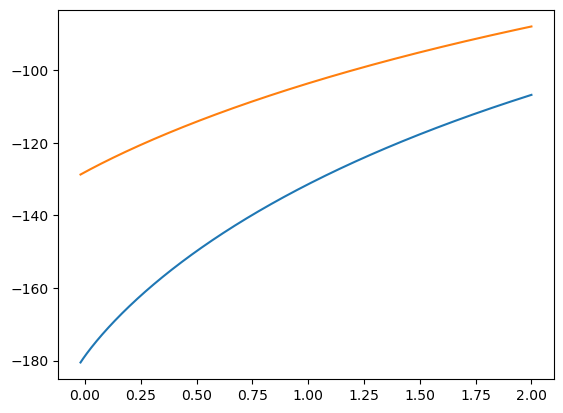

In [108]:
import matplotlib.pyplot as plt
plt.plot(a, v[:,0])
plt.plot(a, v[:,1])

In [111]:
v0

array([[-201.20724346, -100.30090271],
       [-200.96171659, -100.23985247],
       [-200.71678821, -100.17887651],
       [-200.47245613, -100.11797469],
       [-200.22871818, -100.05714687],
       [-199.98557218,  -99.99639292],
       [-199.743016  ,  -99.9357127 ],
       [-199.50104748,  -99.87510608],
       [-199.25966449,  -99.81457293],
       [-199.01886491,  -99.75411311],
       [-198.77864663,  -99.69372649],
       [-198.53900754,  -99.63341293],
       [-198.29994556,  -99.57317231],
       [-198.06145859,  -99.5130045 ],
       [-197.82354457,  -99.45290935],
       [-197.58620143,  -99.39288674],
       [-197.34942713,  -99.33293653],
       [-197.11321962,  -99.2730586 ],
       [-196.87757687,  -99.21325282],
       [-196.64249685,  -99.15351906],
       [-196.40797755,  -99.09385717],
       [-196.17401697,  -99.03426705],
       [-195.94061311,  -98.97474855],
       [-195.70776399,  -98.91530154],
       [-195.47546763,  -98.85592591],
       [-195.24372207,  -